# Requirements

- python package emoji
- Symbola.ttf under `./Symbola/Symbola.ttf`

In [10]:
import codecs
import emoji
import os

In [11]:
# see https://stackoverflow.com/questions/29760402/converting-a-txt-file-to-an-image-in-python
from PIL import Image, ImageDraw, ImageFont, ImageOps

In [12]:
with codecs.open('watsoncrick003.txt', encoding='utf-8') as f:
    lines = f.read()

In [13]:
# extract all emojis in text
emojis = []
for c in lines:
    if c in emoji.UNICODE_EMOJI and c not in emojis:
        emojis.append(c)

In [86]:
maxrow = 2400
maxcol = 2400
fontsize = 96

In [95]:
font = ImageFont.truetype('./Symbola/Symbola.ttf', size=fontsize)
image = Image.new('L', (maxcol, maxrow), color=255)
draw = ImageDraw.Draw(image)

In [96]:
# get max width/height for the emojis
maxwidth = max(map(lambda x: font.getsize(x)[0], emojis))
maxheight = max(map(lambda x: font.getsize(x)[1], emojis))
buffer = 20  # in pixel

In [97]:
# make a "plate" of emojis
x = 10
y = 10
for e in emojis:
    draw.text((x, y), e, fill=0, font=font)
    newx = x + buffer + maxwidth
    if newx + maxwidth > maxcol:
        y += maxheight + buffer
        x = 10
    else:
        x = newx

In [98]:
# crop it
c_box = ImageOps.invert(image).getbbox()
# keep some space
c_box = (0, 0, c_box[2] + 20, c_box[3] + 20)

image = image.crop(c_box)

In [99]:
image.save('all_emojis.png')

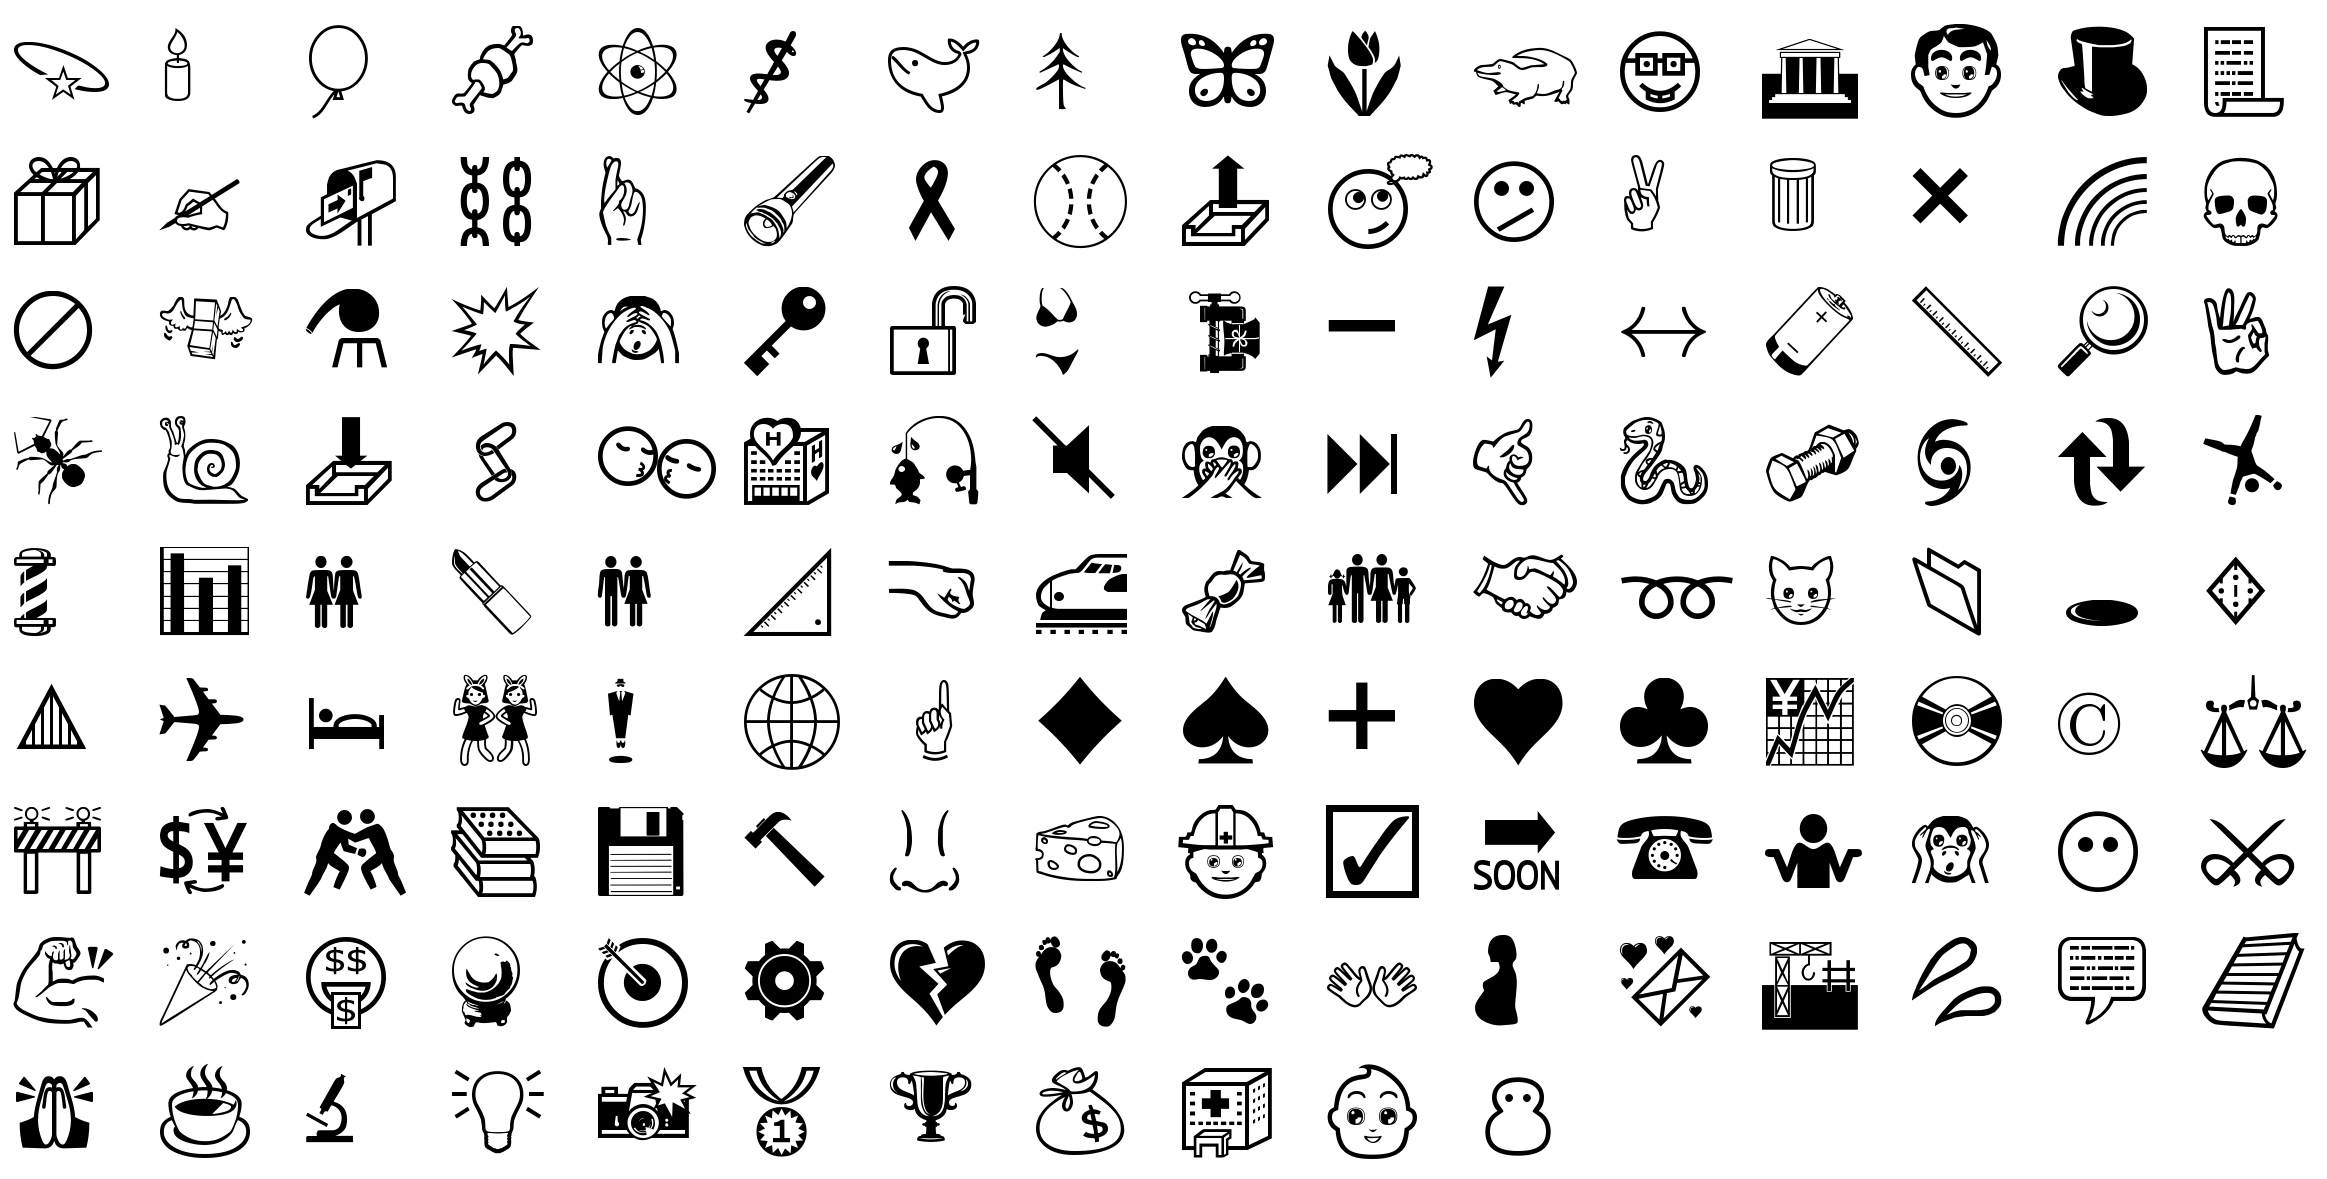

In [100]:
image

Plot individual emojis

In [17]:
try:
    os.makedirs('emojis')
except OSError:
    pass

font = ImageFont.truetype('./Symbola/Symbola.ttf', size=300)
for e in emojis:
    image = Image.new('L', (600, 600), color=255)
    draw = ImageDraw.Draw(image)
    draw.text((40, 40), e, fill=0, font=font)
    fn = 'emoji_' + emoji.UNICODE_EMOJI[e].replace(':', '')
    
    # crop it
    c_box = ImageOps.invert(image).getbbox()
    # add some whitespace
    c_box = (0, 0, c_box[2] + 40, c_box[3] + 40)
    image = image.crop(c_box)
    
    image.save('emojis/' + fn + '.png')